In [114]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()


Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills Ã¢Â€Â¢ R Ã¢Â€Â¢ Python Ã¢Â€Â¢ SAP HANA Ã¢Â€Â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [117]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [118]:
df.describe()

Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18

In [121]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [126]:
df.shape

(962, 4)

In [123]:
#Performing EDA

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|mailto:\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned_resume'] = df['Resume'].apply(clean_text)
df[['Resume', 'cleaned_resume', 'Category']].head()


Resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills Ã¢Â€Â¢ R Ã¢Â€Â¢ Python Ã¢Â€Â¢ SAP HANA Ã¢Â€Â¢ Table...   
4  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                      cleaned_resume      Category  
0  skills programming languages python pandas num...  Data Science  
1  education details may may uitrgpv data scienti...  Data Science  
2  areas interest deep learning control system de...  Data Science  
3  skills Ã¢ r Ã¢ python Ã¢ sap hana Ã¢ tableau Ã¢ sap...  Data Science  
4  education details mca ymcaust faridabad haryan...  Data Science

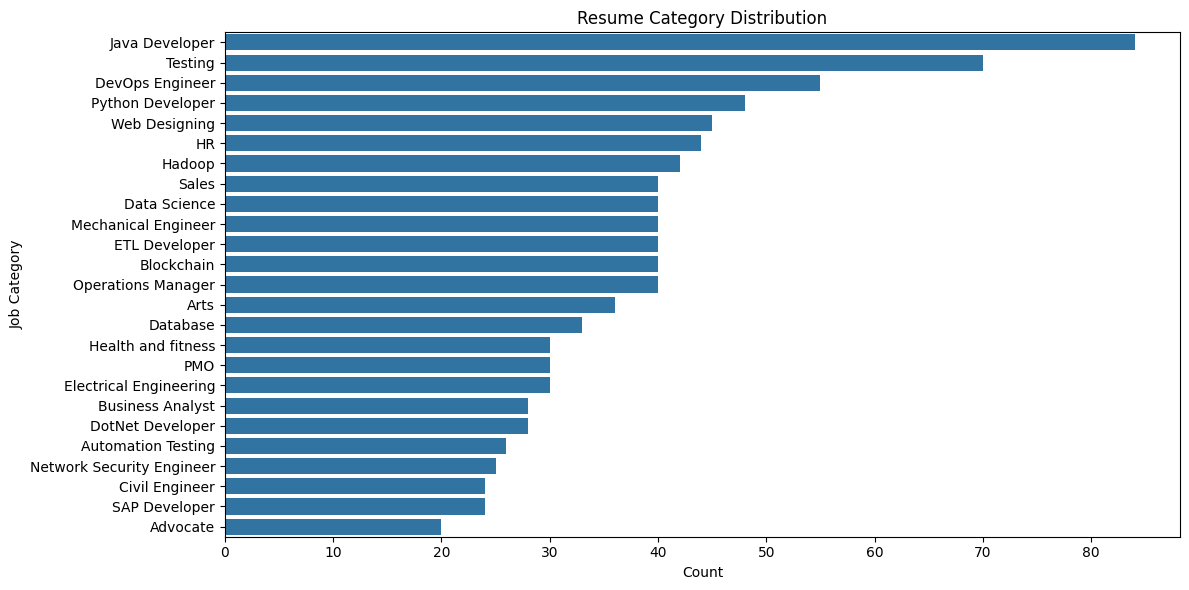

In [124]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title("Resume Category Distribution")
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()


In [125]:
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

#  print mapping
for i, label in enumerate(le.classes_):
    print(f"{label} â†’ {i}")

y = df['Category_encoded']


Advocate â†’ 0
Arts â†’ 1
Automation Testing â†’ 2
Blockchain â†’ 3
Business Analyst â†’ 4
Civil Engineer â†’ 5
Data Science â†’ 6
Database â†’ 7
DevOps Engineer â†’ 8
DotNet Developer â†’ 9
ETL Developer â†’ 10
Electrical Engineering â†’ 11
HR â†’ 12
Hadoop â†’ 13
Health and fitness â†’ 14
Java Developer â†’ 15
Mechanical Engineer â†’ 16
Network Security Engineer â†’ 17
Operations Manager â†’ 18
PMO â†’ 19
Python Developer â†’ 20
SAP Developer â†’ 21
Sales â†’ 22
Testing â†’ 23
Web Designing â†’ 24


In [104]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_resume']).toarray()


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [131]:
y_pred = model.predict(X_test)

print("âœ… Accuracy:", accuracy_score(y_test, y_pred))
print("\nðŸ“Š Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



âœ… Accuracy: 0.9948186528497409

ðŸ“Š Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12

In [132]:
import joblib
joblib.dump(model, 'resume_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']